# Data Collection and Understanding

In this phase, we explore the "Streaming Subscription Churn Model" dataset to understand its structure, identify data quality issues, and form initial hypotheses about which variables may influence churn.

identify the probability that customers will abandon the product


## Data Dictionary – Original Dataset State

| Column                      | Type       | Description                                                                                          |
|-----------------------------|-----------|-----------------------------------------------------------------------------------------------------|
| customer_id                 | int64     | Unique customer identifier.                                                                    |
| age                         | int64     | User age.                                                                                   |
| location                    | object    | State (USA) where the user resides.                                                                |
| subscription_type           | object    | Type of subscription contracted by the user.                                                       |
| payment_plan                | object    | Payment frequency: monthly or annual.                                                                 |
| num_subscription_pauses     | int64     | Number of times the user has paused their subscription.                                   |
| payment_method              | object    | Payment method chosen by the user (card, PayPal, etc.).                                        |
| customer_service_inquiries  | object    | Frequency of inquiries or complaints made to customer service.                                |
| signup_date                 | int64     | Registration date on the platform.                           |
| weekly_hours                | float64   | Average listening hours per week.                                                              |
| average_session_length      | float64   | Average duration of each listening session (in hours).                                                 |
| song_skip_rate              | float64   | Percentage of songs that the user doesn't finish listening to.                                        |
| weekly_songs_played        | int64     | Average number of songs played per week.                                                |
| weekly_unique_songs        | int64     | Average number of different songs played per week.                                      |
| num_favorite_artists       | int64     | Number of artists marked as favorites.                                                          |
| num_platform_friends       | int64     | Number of contacts or friends of the user within the app.                                           |
| num_playlists_created      | int64     | Number of playlists created by the user.                                                          |
| num_shared_playlists       | int64     | Number of publicly shared playlists.                                                         |
| notifications_clicked     | int64     | Number of notifications clicked within the app.                                                  |
| churned                    | int64     | Target variable: 0 = active customer, 1 = customer who churned.                                    |

**Source:** [Streaming Subscription Churn Model Competition](https://www.kaggle.com/competitions/streaming-subscription-churn-model/team)

## Load and Review Data
- Check dataset size.
- First rows to verify structure.
- Data types and general summary.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv") 

print("\nDataset dimensions:")
print(df.shape)

print("\n" + "-"*40)

print("\nFirst rows of the dataset:")
print(df.head())

print("\n" + "-"*40)

print("\nData types of each column:")
print(df.dtypes)

print("\n" + "-"*40)

print("\nGeneral dataset summary:")
df.info()



Dataset dimensions:
(125000, 20)

----------------------------------------

First rows of the dataset:
   customer_id  age    location subscription_type payment_plan  \
0            1   32     Montana              Free       Yearly   
1            2   64  New Jersey              Free      Monthly   
2            3   51  Washington           Premium       Yearly   
3            4   63  California            Family       Yearly   
4            5   54  Washington            Family      Monthly   

   num_subscription_pauses payment_method customer_service_inquiries  \
0                        2         Paypal                     Medium   
1                        3         Paypal                        Low   
2                        2    Credit Card                       High   
3                        4      Apple Pay                     Medium   
4                        3         Paypal                       High   

   signup_date  weekly_hours  average_session_length  song_skip_ra

## Detection of Null and Inconsistent Values
- Count of null values per column.
- Review of impossible or inconsistent data (example: negative ages, future dates).

In [2]:
# Null count
print("\nCount of null values per column:")
print(df.isnull().sum())


# Review statistics of the 'age' column
print("\nStatistics of the 'age' column:")
print(df['age'].describe())



# Base date that you define as "today"
fecha_base = pd.to_datetime("2025-07-15")

# Convert negative days to real dates
df["signup_date_real"] = fecha_base + pd.to_timedelta(df["signup_date"], unit="D")

# Now you can verify if there are future dates (which there shouldn't be)
print("\nSignup dates greater than the base date:")
print(df[df["signup_date_real"] > fecha_base])



Count of null values per column:
customer_id                   0
age                           0
location                      0
subscription_type             0
payment_plan                  0
num_subscription_pauses       0
payment_method                0
customer_service_inquiries    0
signup_date                   0
weekly_hours                  0
average_session_length        0
song_skip_rate                0
weekly_songs_played           0
weekly_unique_songs           0
num_favorite_artists          0
num_platform_friends          0
num_playlists_created         0
num_shared_playlists          0
notifications_clicked         0
churned                       0
dtype: int64

Statistics of the 'age' column:
count    125000.000000
mean         48.414136
std          17.901042
min          18.000000
25%          33.000000
50%          48.000000
75%          64.000000
max          79.000000
Name: age, dtype: float64

Signup dates greater than the base date:
Empty DataFrame
Columns: [cu

## Customer Tenure Calculation (`customer_tenure`)

A new variable called `customer_tenure_days` is created that represents each customer's tenure in days, calculated as the difference between a base date and the real registration date (`signup_date_real`). Subsequently, it is converted to years (`customer_tenure_years`) by dividing by 365.

In [3]:
df["customer_tenure_days"] = (fecha_base - df["signup_date_real"]).dt.days
df["customer_tenure_years"] = df["customer_tenure_days"] / 365
print(df[["customer_tenure_days", "customer_tenure_years"]])
df[["customer_tenure_days", "customer_tenure_years"]].head()  # Show the first 5 rows


        customer_tenure_days  customer_tenure_years
0                       1606               4.400000
1                       2897               7.936986
2                        348               0.953425
3                       2894               7.928767
4                         92               0.252055
...                      ...                    ...
124995                  1895               5.191781
124996                  2778               7.610959
124997                   604               1.654795
124998                  2570               7.041096
124999                  1934               5.298630

[125000 rows x 2 columns]


,customer_tenure_days,customer_tenure_years
0,1606,4.400000
1,2897,7.936986
2,348,0.953425
3,2894,7.928767
4,92,0.252055


## Target Variable Analysis (`churned`)
- Distribution of churners (1) vs. non-churners (0).
- Churn percentage.
- Possible class imbalance.


Count of churned (0 = no churn, 1 = churn):
churned
1    64174
0    60826
Name: count, dtype: int64

----------------------------------------

Percentage of churned:
churned
1    51.3392
0    48.6608
Name: proportion, dtype: float64

----------------------------------------


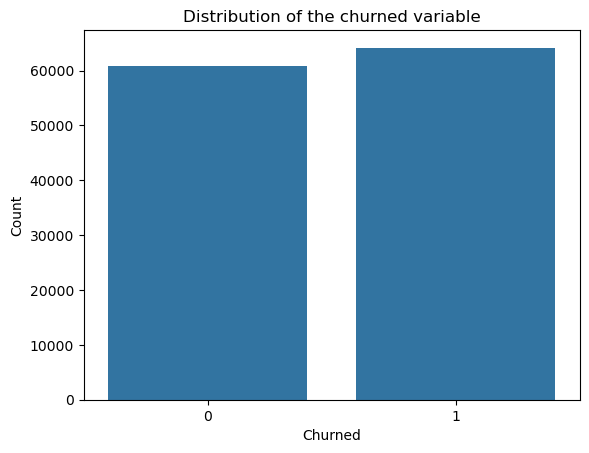

In [4]:
# Absolute count
print("\nCount of churned (0 = no churn, 1 = churn):")
print(df['churned'].value_counts())

print("\n" + "-"*40)

# Percentage
print("\nPercentage of churned:")
print(df['churned'].value_counts(normalize=True) * 100)

print("\n" + "-"*40)

# Distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churned', data=df)
plt.title('Distribution of the churned variable')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

After exploring the target variable distribution, we obtain:

| churned | Count | Percentage |
|--------|--------|-----------:|
| 1 (yes churn) | 64,174 | 51.3% |
| 0 (no churn) | 60,826 | 48.7% |

---

### Interpretation
- Approximately 51.3% of users in our historical data have abandoned the service, while 48.7% remain active.
- This implies that the database is slightly imbalanced, although not extremely so:
- A churn rate above 50% reflects a real challenge for the business: more than half of users do not retain their subscription, which justifies prioritizing retention actions.


## Understanding Numerical Variables
- Descriptive statistics.
- Distribution of values (histograms).
- Potential outliers.
- Relationship with churn (mean by group, boxplots).

The vector `num_cols` is manually defined to focus the analysis on key numerical variables related to user engagement and behavior within the platform.



Descriptive statistics for numerical variables:
         customer_id            age  num_subscription_pauses    signup_date  \
count  125000.000000  125000.000000            125000.000000  125000.000000   
mean    62500.500000      48.414136                 1.991144   -1460.678936   
min         1.000000      18.000000                 0.000000   -2922.000000   
25%     31250.750000      33.000000                 1.000000   -2190.000000   
50%     62500.500000      48.000000                 2.000000   -1462.000000   
75%     93750.250000      64.000000                 3.000000    -728.000000   
max    125000.000000      79.000000                 4.000000      -1.000000   
std     36084.536162      17.901042                 1.417201     844.132871   

        weekly_hours  average_session_length  song_skip_rate  \
count  125000.000000           125000.000000   125000.000000   
mean       25.036985               60.421725        0.500802   
min         0.000068                1.000526   

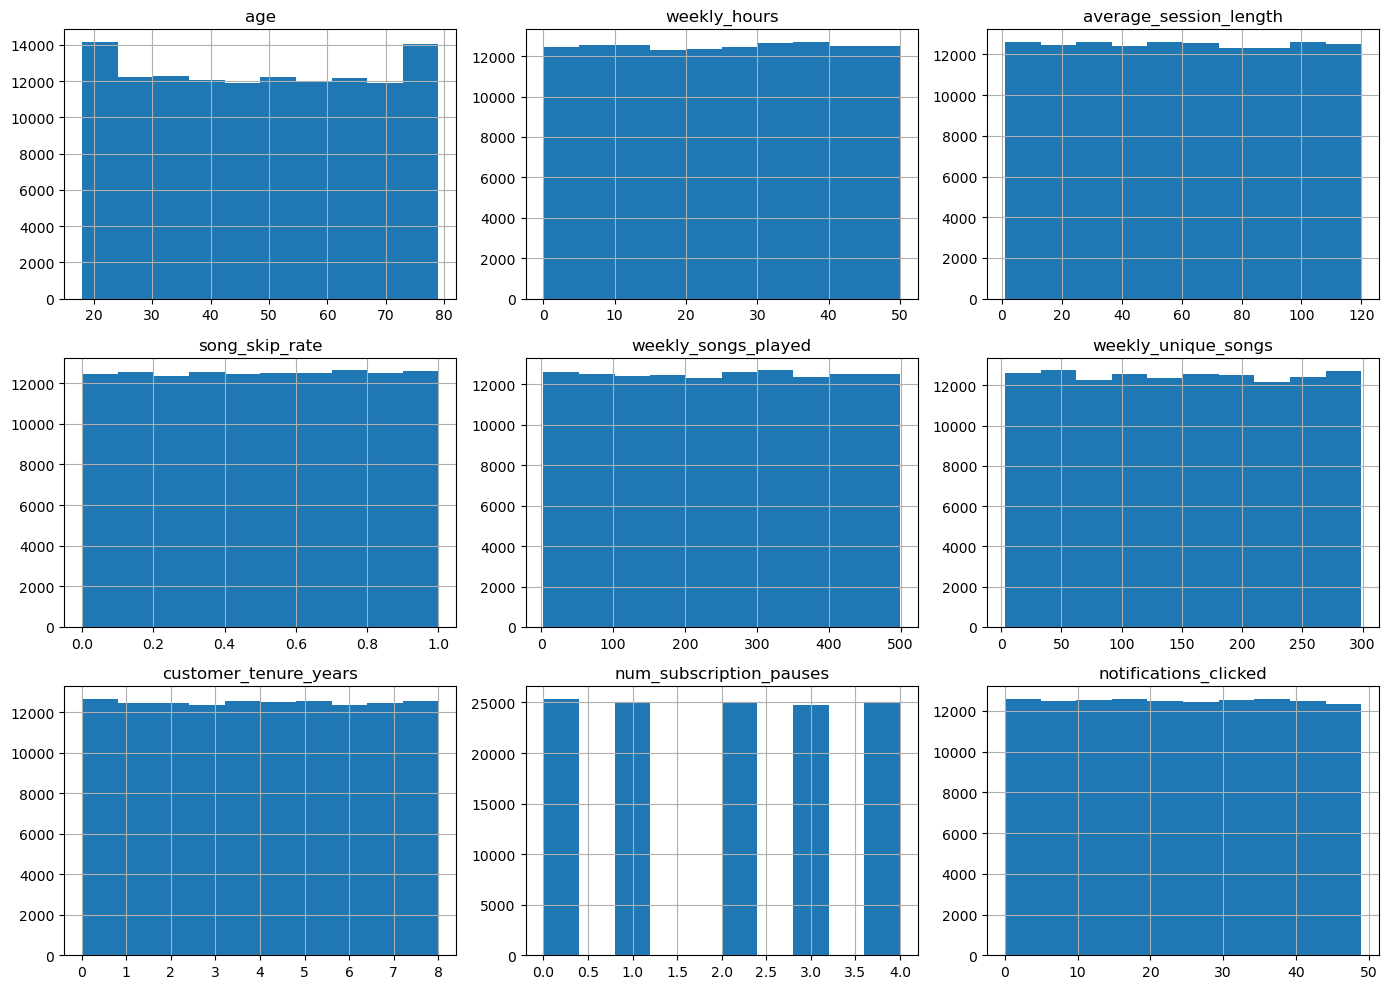


----------------------------------------

Mean of each numerical variable by churn status (0 = no churn, 1 = churn):
               age  weekly_hours  average_session_length  song_skip_rate  \
churned                                                                    
0        47.518660     29.525461               60.651298        0.453300   
1        49.262895     20.782675               60.204129        0.545826   

         weekly_songs_played  weekly_unique_songs  customer_tenure_years  \
churned                                                                    
0                 250.690313           149.077566               3.999003   
1                 250.950572           152.400131               4.004568   

         num_subscription_pauses  notifications_clicked  
churned                                                  
0                       1.724723              25.075264  
1                       2.243666              23.851217  

---------------------------------------

In [5]:
# General descriptive statistics
print("\nDescriptive statistics for numerical variables:")
print(df.describe())

print("\n" + "-"*40)

# List of key numerical variables
num_cols = ['age', 'weekly_hours', 'average_session_length', 'song_skip_rate', 
            'weekly_songs_played', 'weekly_unique_songs', 'customer_tenure_years',
            'num_subscription_pauses', 'notifications_clicked']

print("\nDisplaying histograms for key variables:")
df[num_cols].hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

print("\n" + "-"*40)

# View mean of each variable by churn status
print("\nMean of each numerical variable by churn status (0 = no churn, 1 = churn):")
print(df.groupby('churned')[num_cols].mean())

print("\n" + "-"*40)


# Comparative Analysis of Means by Churn Status

| Variable                   | No churn (0) | Churn (1) | Observation                                                                                   |
|---------------------------:|-------------:|----------:|-----------------------------------------------------------------------------------------------|
| age                        | 47.5         | 49.3      | Users who churned are on average slightly older (~1.7 years).                                 |
| weekly_hours               | 29.5         | 20.8      | Users who churned spend less time on the platform (~9 hours less per week).                   |
| average_session_length     | 60.6         | 60.2      | Virtually the same; doesn't appear to be relevant.                                            |
| song_skip_rate             | 0.45         | 0.54      | Users who churned skip more songs (+0.09).                                                    |
| weekly_songs_played        | 250.7        | 250.9     | Almost identical; not relevant.                                                               |
| weekly_unique_songs        | 149.1        | 152.4     | Slightly more variety among churned users, but the difference is very small.                   |
| customer_tenure_years     | 3.99         | 4.00      | Practically identical; not relevant.                                                          |
| num_subscription_pauses    | 1.72         | 2.24      | Users who churned paused their subscription more often (+0.5).                                |
| notifications_clicked      | 25.07        | 23.85     | Users who did not churn clicked on more notifications (+1.2).                                 |

## General Conclusions

The biggest differences between users who stay and those who churn are in:

- **weekly_hours:** churned users spend significantly less time on the platform.
- **song_skip_rate:** churned users tend to skip more songs.
- **num_subscription_pauses:** churned users paused their subscription more frequently.
- **notifications_clicked:** users who stay interact slightly more with notifications.

Variables like `average_session_length`, `weekly_songs_played`, or `customer_tenure` show very small or almost negligible differences.

Some differences may seem small, but they could still be statistically significant and useful for predictive models.

This analysis helps to better understand the profile of users likely to churn and will serve as a foundation for interpreting model results.

## Correlation Analysis Among Numerical Variables

Next, we calculate and visualize the Pearson correlation matrix for the main numerical variables in the dataset, including the target variable `churned` and `customer_tenure_years`.


Correlation matrix among numerical variables:
                              age  weekly_hours  average_session_length  \
age                      1.000000      0.001813                0.000620   
weekly_hours             0.001813      1.000000                0.001205   
average_session_length   0.000620      0.001205                1.000000   
song_skip_rate           0.001855      0.005733               -0.004149   
weekly_songs_played     -0.001652     -0.001648               -0.000439   
weekly_unique_songs     -0.000874     -0.000502               -0.004625   
num_subscription_pauses -0.000256      0.003791                0.001124   
num_favorite_artists     0.002247     -0.005067                0.001524   
num_platform_friends     0.000991     -0.007119               -0.000121   
num_playlists_created    0.003380     -0.000633                0.005666   
num_shared_playlists     0.001365     -0.001510               -0.004869   
notifications_clicked   -0.000134     -0.003971      

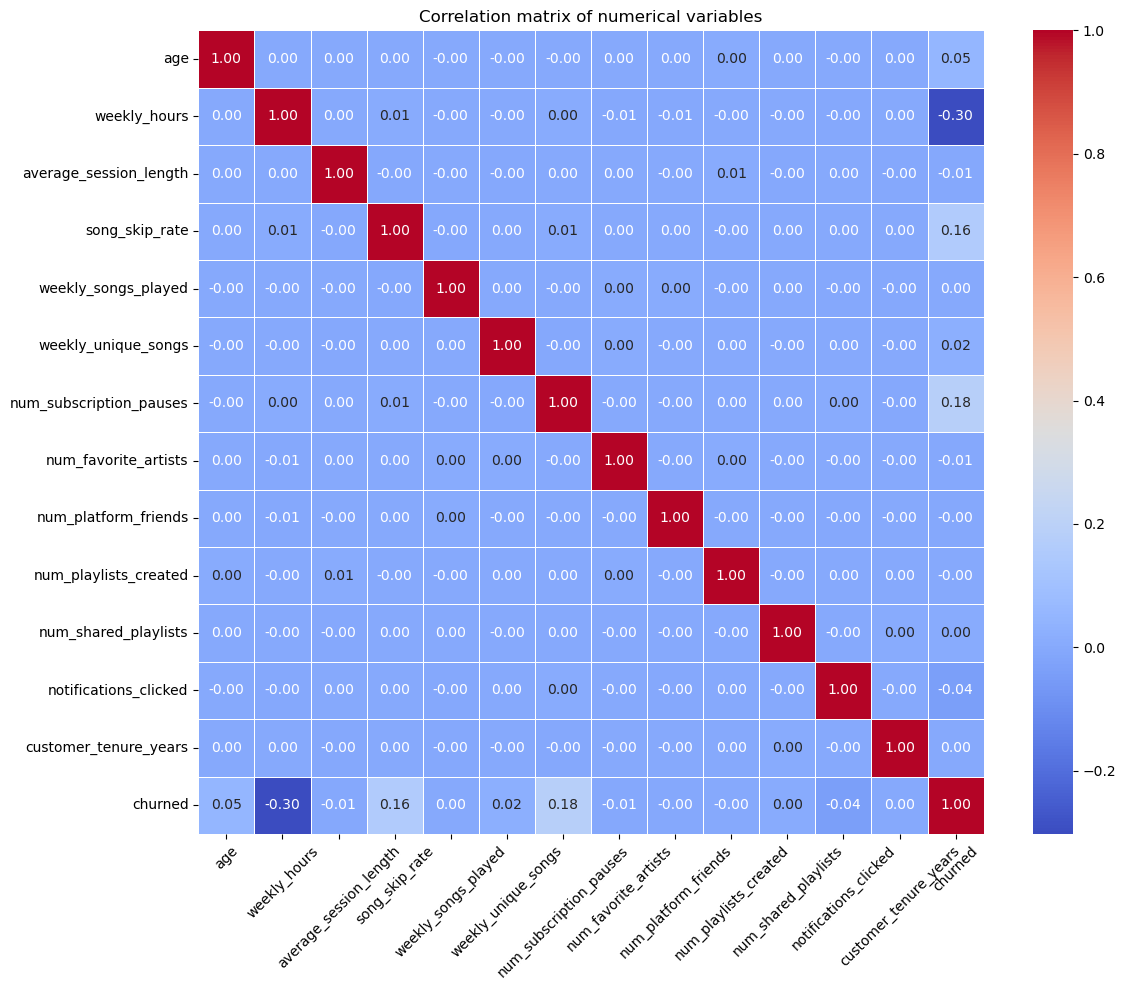

In [6]:
# List of numerical columns (including customer_tenure_years and churned)
num_cols = [
    'age',
    'weekly_hours',
    'average_session_length',
    'song_skip_rate',
    'weekly_songs_played',
    'weekly_unique_songs',
    'num_subscription_pauses',
    'num_favorite_artists',
    'num_platform_friends',
    'num_playlists_created',
    'num_shared_playlists',
    'notifications_clicked',
    'customer_tenure_years',
    'churned'
]

# 1. Compute the Pearson correlation matrix
corr_matrix = df[num_cols].corr()

# 2. Print the full correlation matrix to the console
print("\nCorrelation matrix among numerical variables:")
print(corr_matrix)

print("\n" + "-"*40)

# 3. Visualize with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix of numerical variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Hypotheses Based on Numerical Variables

Based on the analysis of means by churn status and the correlation matrix, we propose the following hypotheses:

1. Users who spend less time per week on the platform (`weekly_hours`) are more likely to churn, as indicated by a moderate negative correlation with churn (`-0.30`).
2. A higher song skip rate (`song_skip_rate`) is associated with a greater likelihood of churn, shown by a positive correlation (`0.16`).
3. A greater number of subscription pauses (`num_subscription_pauses`) is related to higher churn (`0.18`).
4. Age (`age`) might have a slight influence on churn (low correlation of `0.04`): slightly older users tend to churn more.
5. Other variables like `average_session_length`, `weekly_songs_played`, `weekly_unique_songs`, `customer_tenure_years`, etc., show very low correlations, so we expect them to have less predictive power in the model.


## Understanding Categorical Variables
- Unique values and frequency of each category.
- Churn distribution across each category.
- Possible grouping of infrequent categories.

The vector `cat_cols` is manually defined to include only the categorical variables relevant to the business, avoiding irrelevant columns.




subscription_type - unique values and frequency:
subscription_type
Premium    31354
Student    31305
Free       31269
Family     31072
Name: count, dtype: int64

----------------------------------------

Churn rate by subscription_type:
subscription_type
Free       0.794077
Student    0.573934
Family     0.345810
Premium    0.339095
Name: churned, dtype: float64

----------------------------------------


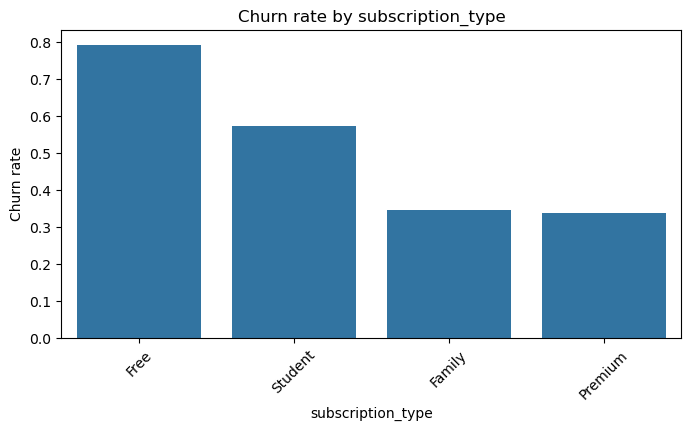



payment_plan - unique values and frequency:
payment_plan
Monthly    62562
Yearly     62438
Name: count, dtype: int64

----------------------------------------

Churn rate by payment_plan:
payment_plan
Monthly    0.514066
Yearly     0.512717
Name: churned, dtype: float64

----------------------------------------


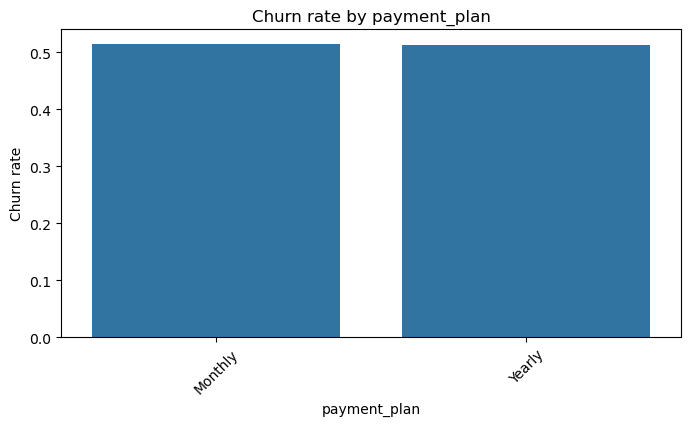



payment_method - unique values and frequency:
payment_method
Debit Card     31292
Paypal         31282
Credit Card    31213
Apple Pay      31213
Name: count, dtype: int64

----------------------------------------

Churn rate by payment_method:
payment_method
Apple Pay      0.518950
Debit Card     0.514988
Paypal         0.511572
Credit Card    0.508058
Name: churned, dtype: float64

----------------------------------------


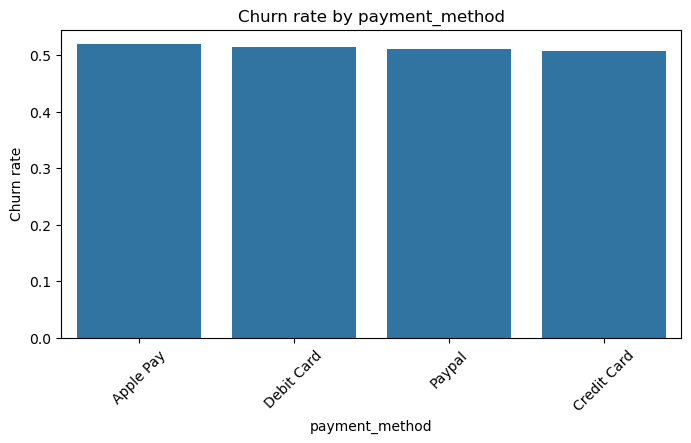



location - unique values and frequency:
location
Georgia           6705
Idaho             6697
Vermont           6676
California        6665
Washington        6638
New Jersey        6634
Nebrasksa         6601
North Carolina    6583
Utah              6577
North Dakota      6577
New York          6574
Alabama           6555
Wisconsin         6553
Virginia          6541
South Carolina    6534
Maine             6523
West Virginia     6486
Florida           6480
Montana           6401
Name: count, dtype: int64

----------------------------------------

Churn rate by location:
location
Georgia           0.521551
Washington        0.517324
Wisconsin         0.517168
New Jersey        0.516883
South Carolina    0.516529
North Dakota      0.516041
Vermont           0.515578
Utah              0.514824
California        0.513878
West Virginia     0.513876
North Carolina    0.513444
Nebrasksa         0.512953
Montana           0.512420
Idaho             0.511274
New York          0.510648
Alaba

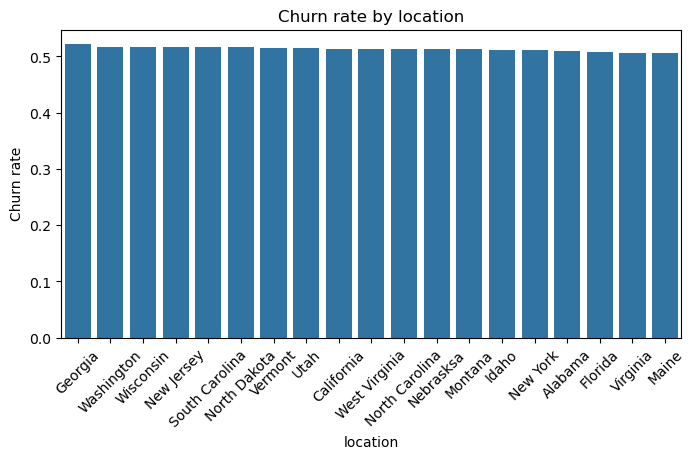



customer_service_inquiries - unique values and frequency:
customer_service_inquiries
Low       41873
High      41583
Medium    41544
Name: count, dtype: int64

----------------------------------------

Churn rate by customer_service_inquiries:
customer_service_inquiries
High      0.743333
Medium    0.509171
Low       0.289232
Name: churned, dtype: float64

----------------------------------------


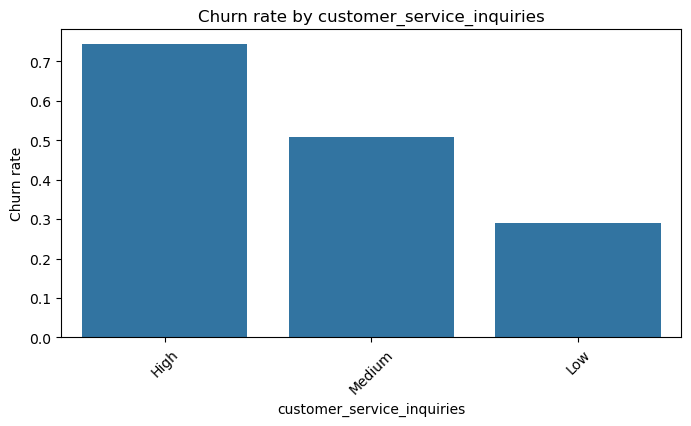

In [7]:
cat_cols = ['subscription_type', 'payment_plan', 'payment_method', 'location', 'customer_service_inquiries']

for col in cat_cols:
    print("\n" + "="*60)
    print(f"\n{col} - unique values and frequency:")
    print(df[col].value_counts())
    
    print("\n" + "-"*40)
    
    # Churn distribution by category
    churn_rate = df.groupby(col)['churned'].mean().sort_values(ascending=False)
    print(f"\nChurn rate by {col}:")
    print(churn_rate)
    
    print("\n" + "-"*40)
    
    # Plot churn rate by category
    plt.figure(figsize=(8, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.xticks(rotation=45)
    plt.title(f'Churn rate by {col}')
    plt.ylabel('Churn rate')
    plt.xlabel(col)
    plt.show()


## Churn Rate by Categorical Variables

| Variable                     | Category      | Churn rate (%) |
|-----------------------------:|:-------------|---------------:|
| **subscription_type**       | Free          | 79.4           |
|                             | Student       | 57.3           |
|                             | Family        | 34.5           |
|                             | Premium       | 33.9           |
| **payment_plan**           | Monthly       | 51.4           |
|                             | Yearly        | 51.2           |
| **payment_method**         | Apple Pay     | 51.8           |
|                             | Debit Card    | 51.4           |
|                             | Paypal        | 51.1           |
|                             | Credit Card   | 50.8           |
| **customer_service_inquiries** | High       | 74.3           |
|                             | Medium        | 50.9           |
|                             | Low           | 28.9           |
| **location** (Top 5)       | Georgia       | 52.1           |
|                             | Washington    | 51.7           |
|                             | Wisconsin     | 51.7           |
|                             | New Jersey    | 51.6           |
|                             | South Carolina| 51.6           |

> Note: only the top 5 locations with the highest churn rates are shown for simplicity.


## Hypotheses Based on Categorical Variables

- Users with a free or student subscription have a higher likelihood of churn.
- A higher number of customer service inquiries (category "High") is associated with higher churn.
- Payment method may slightly influence churn, with churn being slightly lower among users who pay by credit card.
- Payment frequency (monthly vs. yearly) does not seem to have a significant effect on churn.
- Churn varies slightly by user location, although the differences are small.

## Descriptive Analysis Before Scaling Numerical Variables

Before applying scaling techniques, we create a statistical summary of all numerical variables to understand their range, distribution, and potential outliers.

| Variable                  | Min   | Max    | Mean  | Std. deviation | Observations |
|--------------------------:|------:|-------:|------:|---------------:|:-------------|
| age                      | 18    | 79     | 48.4  | 17.9           | Wide distribution across younger and older users |
| weekly_hours             | ≈0    | ~50    | 25    | 14.4           | Considerable variation; potential low outliers |
| average_session_length   | ≈1    | ~120   | 60.4  | 34.3           | Very wide range; some users with long sessions |
| song_skip_rate           | ≈0    | ~1     | 0.50  | 0.28           | Nearly centered distribution but possible extremes |
| weekly_songs_played     | 3     | 499    | 250.8 | 143.3          | Wide range; high values could have influence |
| weekly_unique_songs     | 3     | 299    | 150.7 | 85.7           | Distribution similar to songs_played |
| num_subscription_pauses | 0     | 4      | 1.99  | 1.41           | Discrete, few possible values |
| num_favorite_artists    | 0     | 49     | 24.5  | 14.4           | Centered around ~24 |
| num_platform_friends    | 0     | 199    | 99.7  | 57.6           | Wide distribution; possible skewness |
| num_playlists_created   | 0     | 99     | 49.4  | 28.9           | Moderate range |
| num_shared_playlists    | 0     | 49     | 24.5  | 14.4           | Similar to playlists_created |
| notifications_clicked   | 0     | 49     | 24.4  | 14.4           | Balanced distribution |
| customer_tenure_days    | 1     | 2922   | 1460  | 844            | Wide spread (~0 to 8 years) |
| customer_tenure_years   | ≈0.002| ~8     | 4.0   | 2.31           | Broad variability |

**Conclusions:**
- Several variables have large ranges and significant differences between minimum and maximum values.
- Some variables may contain potential outliers (e.g., `weekly_hours` close to 0, `average_session_length` up to 120).
- It is recommended to apply scaling techniques so that all numerical variables are on a comparable scale before training the model.



## Data Preparation and Processing for Churn Models

In this code block, we prepare the data to train churn prediction models.  
Several important transformations are applied:

---

### 1. Data Loading
- Read the `train.csv` and `test.csv` files into pandas DataFrames.

---

### 2. Calculating Customer Tenure
- Convert `signup_date` to datetime format.
- Create two new variables:
  - `customer_tenure_days`: number of days from signup until a reference date (`2025-07-16`).
  - `customer_tenure_years`: tenure in years.
- These variables allow models to consider how long a customer has been using the service.

---

### 3. Categorical Variable Encoding  
We apply **two different encoding techniques** to create two separate datasets:

#### ◾ Label Encoding
- Transforms each category into an integer.
- Applied to the following columns:
  - `location`
  - `subscription_type`
  - `payment_plan`
  - `payment_method`
  - `customer_service_inquiries`
- Store the `LabelEncoder` objects used so future data can be encoded the same way.

#### ◾ One-Hot Encoding
- Creates new binary columns (0 or 1) for each category.
- Use `pd.get_dummies` with `drop_first=True` to avoid multicollinearity.
- Align train and test columns to ensure they have the same structure.

---

### 4. Standardizing Numerical Variables
- Identify all relevant numerical variables, including newly created ones:
  - Original variables like `age`, `weekly_hours`, etc.
  - New variables: `customer_tenure_days` and `customer_tenure_years`.
- Apply `StandardScaler`:
  - To `df_train_label` and `df_test_label`.
  - To `df_train_onehot` and `df_test_onehot`.

---

### 5. Separating Features and Target
- For training data (`train`):
  - Separate `churned` as the target variable (`y_train_label` and `y_train_onehot`).
  - Use the remaining columns as features (`X_train_label` and `X_train_onehot`).
- For test data (`test`):
  - Only prepare features (`X_test_label` and `X_test_onehot`), since it doesn’t include the `churned` column.

---

**Final result:**  
Two versions of the dataset ready for modeling:
- One using Label Encoding.
- Another using One-Hot Encoding.

These transformations allow us to compare which encoding method performs better in classification models.

---

**Evaluate model performance** on the validation set using metrics like:
- **AUC-ROC:** measures the model’s ability to correctly separate classes.
- **Accuracy:** proportion of correct predictions.
- **Precision:** percentage of positive predictions that are correct.
- **Recall:** percentage of actual positive cases correctly identified.
- **F1-score:** balance between precision and recall.

**Main Metric Selected: AUC-ROC**

**Why is AUC-ROC the best choice for churn models?**

**1. Insensitivity to Class Imbalance**
- Our dataset has slight imbalance (51.3% churn vs 48.7% no churn)
- AUC-ROC remains valid regardless of class distribution
- Avoids misleading accuracy in imbalanced datasets

**2. Flexibility with Decision Thresholds**
- Allows evaluating the model without fixing a specific probability threshold
- Helps adapt to different business strategies:
  - **Lower threshold:** maximize churn detection (higher recall)
  - **Higher threshold:** reduce false positives (higher precision)

**3. Clear and Universal Interpretation**
- **0.5:** Random performance (no predictive value)
- **0.7–0.8:** Good
- **0.8–0.9:** Very good
- **0.9+:** Excellent
- **1.0:** Perfect

**4. Robustness to Changes in Distribution**
- Remains valid if churn proportions change over time
- Especially important in dynamic business environments

**Complementary Metrics**

**Precision and Recall for Business Analysis**
- **Precision:** Efficiency of retention campaigns (avoiding wasted resources on false positives)
- **Recall:** Ability to capture all actual churn cases (preventing customer loss)



In [8]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Calculate customer_tenure_days and customer_tenure_years
df_train['signup_date_real'] = pd.to_datetime(df_train['signup_date'])
df_test['signup_date_real'] = pd.to_datetime(df_test['signup_date'])

base_date = pd.to_datetime("2025-07-16")  # you can change the base date if needed

df_train["customer_tenure_days"] = (base_date - df_train["signup_date_real"]).dt.days
df_train["customer_tenure_years"] = df_train["customer_tenure_days"] / 365

df_test["customer_tenure_days"] = (base_date - df_test["signup_date_real"]).dt.days
df_test["customer_tenure_years"] = df_test["customer_tenure_days"] / 365

df_train = df_train.drop(columns=['signup_date_real'])
df_test = df_test.drop(columns=['signup_date_real'])


# Encoding categorical variables

## LABEL ENCODING
df_train_label = df_train.copy()
df_test_label = df_test.copy()

categorical_cols = [
    'location',
    'subscription_type',
    'payment_plan',
    'payment_method',
    'customer_service_inquiries'
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_train_label[col] = le.fit_transform(df_train_label[col])
    df_test_label[col] = le.transform(df_test_label[col])
    label_encoders[col] = le

## ONE-HOT ENCODING
df_train_onehot = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test_onehot = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Align train and test columns for One-Hot (in case some are missing)
df_train_onehot, df_test_onehot = df_train_onehot.align(df_test_onehot, join='left', axis=1, fill_value=0)

# Scaling numerical variables
numeric_cols = [
    'age', 'weekly_hours', 'average_session_length', 'song_skip_rate',
    'weekly_songs_played', 'weekly_unique_songs', 'num_subscription_pauses',
    'num_favorite_artists', 'num_platform_friends', 'num_playlists_created',
    'num_shared_playlists', 'notifications_clicked'
]

# Add new columns
numeric_cols.extend(['customer_tenure_days', 'customer_tenure_years'])

scaler_label = StandardScaler()
df_train_label[numeric_cols] = scaler_label.fit_transform(df_train_label[numeric_cols])
df_test_label[numeric_cols] = scaler_label.transform(df_test_label[numeric_cols])

scaler_onehot = StandardScaler()
df_train_onehot[numeric_cols] = scaler_onehot.fit_transform(df_train_onehot[numeric_cols])
df_test_onehot[numeric_cols] = scaler_onehot.transform(df_test_onehot[numeric_cols])

# Separate features and target (only in train)
X_train_label = df_train_label.drop(columns=['churned'])
y_train_label = df_train_label['churned']

X_test_label = df_test_label  # test has no 'churned'

X_train_onehot = df_train_onehot.drop(columns=['churned'])
y_train_onehot = df_train_onehot['churned']

X_test_onehot = df_test_onehot.drop(columns=['churned'])  # test has no 'churned'

print("Data ready for modeling.")


Data ready for modeling.


## Training and Evaluation of Classification Models for Label Encoding

In this section, we implement the training and evaluation of two supervised classification models:
- Random Forest
- XGBoost

The goal is to predict whether a customer will churn using data previously encoded with Label Encoding.

### Main steps of the process:

1. **Split the original training set** into an internal training subset and a validation subset, keeping the class balance (stratification).

2. **Set up cross-validation** with StratifiedKFold to ensure each fold respects the original class distribution.

3. **Perform hyperparameter tuning** to find the best configuration for each model:
   - **Random Forest:** using RandomizedSearchCV over hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split`.
   - **XGBoost:** searching for combinations of `n_estimators`, `learning_rate`, and `max_depth`.

4. **Evaluate each model’s performance** on the validation set using metrics like:
   - **AUC-ROC:** measures the model’s ability to correctly separate classes.
   - **Accuracy:** proportion of correct predictions.
   - **Precision:** percentage of positive predictions that are correct.
   - **Recall:** percentage of actual positive cases correctly identified.
   - **F1-score:** balance between precision and recall.

   Additionally, the confusion matrix is displayed to analyze correct and incorrect predictions.

5. **Generate final predictions** on the `X_test_label` set (which has no true labels) with both models and show the first predictions for review.

---

This workflow allows us to evaluate, compare, and save the models that best predict subscription cancellations (churn) based on the available features.

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, make_scorer,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# 1️ Split X_train_label into internal train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_label, y_train_label,
    test_size=0.2,
    random_state=42,
    stratify=y_train_label
)

# 2️ Set up cross-validation and metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# 3️ RandomForest + hyperparameter search
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_dist_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring=roc_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search_rf.fit(X_train, y_train)
best_rf_label = search_rf.best_estimator_

# 4️ XGBoost + hyperparameter search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
param_dist_xgb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6]
}
search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring=roc_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search_xgb.fit(X_train, y_train)
best_xgb_label = search_xgb.best_estimator_

# 5️ Evaluation on X_val / y_val
models = {
    'RandomForest': best_rf_label,
    'XGBoost': best_xgb_label
}

for name, model in models.items():
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    acc  = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec  = recall_score(y_val, y_pred)
    f1   = f1_score(y_val, y_pred)
    auc  = roc_auc_score(y_val, y_proba)
    cm   = confusion_matrix(y_val, y_pred)

    print(f"\n=== {name} on Validation ===")
    print(f"AUC-ROC:   {auc:.4f}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

# 6️ Final predictions on X_test_label with both models
for name, model in models.items():
    y_test_pred = model.predict(X_test_label)
    y_test_proba = model.predict_proba(X_test_label)[:, 1]

    print(f"\n=== {name} - First 10 predictions on test ===")
    for i in range(10):
        print(i, y_test_pred[i], round(y_test_proba[i], 4))



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\jesus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:42:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== RandomForest on Validation ===
AUC-ROC:   0.9347
Accuracy:  0.8478
Precision: 0.8489
Recall:    0.8560
F1-score:  0.8524
Confusion Matrix:
[[10209  1956]
 [ 1848 10987]]

=== XGBoost on Validation ===
AUC-ROC:   0.8732
Accuracy:  0.7724
Precision: 0.7908
Recall:    0.7568
F1-score:  0.7735
Confusion Matrix:
[[9596 2569]
 [3121 9714]]

=== RandomForest - First 10 predictions on test ===
0 1 0.76
1 0 0.48
2 1 0.63
3 1 0.52
4 1 0.53
5 0 0.14
6 0 0.43
7 1 0.68
8 1 0.61
9 0 0.31

=== XGBoost - First 10 predictions on test ===
0 1 0.6336
1 1 0.5532
2 0 0.4346
3 0 0.4314
4 0 0.4549
5 0 0.3363
6 1 0.5987
7 1 0.6336
8 0 0.4649
9 1 0.5533


## Visualization and Saving of Trained Models

In this section of the project, we perform three key steps to document and preserve the results of the trained classification models (**RandomForest** and **XGBoost**) on the data encoded with Label Encoding:

### 1️ Visualization of Feature Importance
We use a custom function `plot_feature_importance` to graphically display which variables carry the most weight in each model. This helps us visually interpret which features best explain churn.

### 2️ Visualization of the Confusion Matrix
Confusion matrices are generated for both models using `ConfusionMatrixDisplay` from scikit-learn. These matrices allow us to identify the number of false positives, false negatives, true positives, and true negatives, making error analysis easier.

### 3️ Saving Trained Models
Finally, the trained models are saved to disk in `.pkl` format using `pickle`. This allows us to reuse them later for predictions on new data, further validation, or production deployment without needing to retrain.

---

This step is essential for documenting results, ensuring reproducibility, and preparing for the next phase of the pipeline: **external evaluation or deployment**.


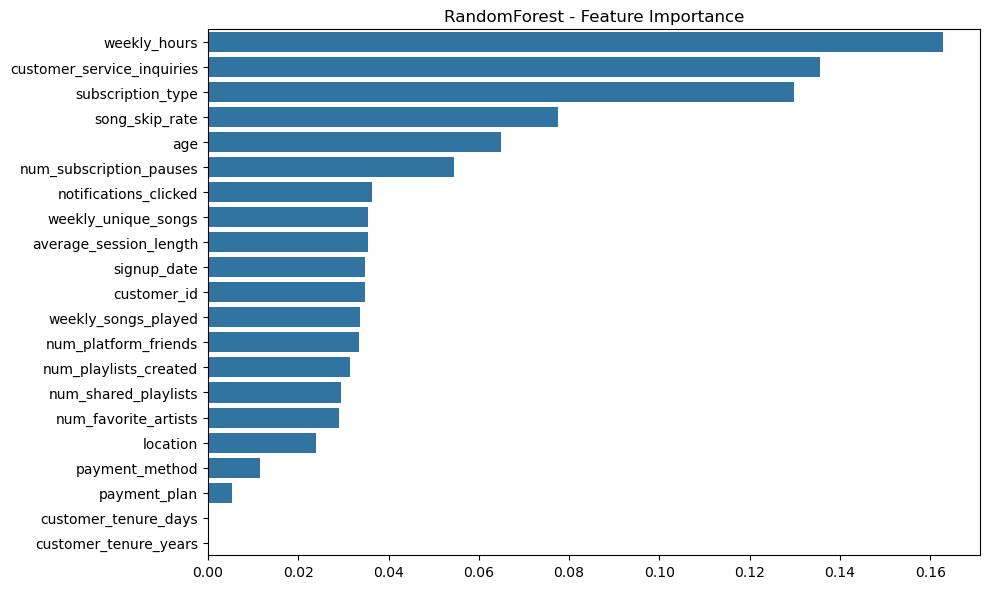

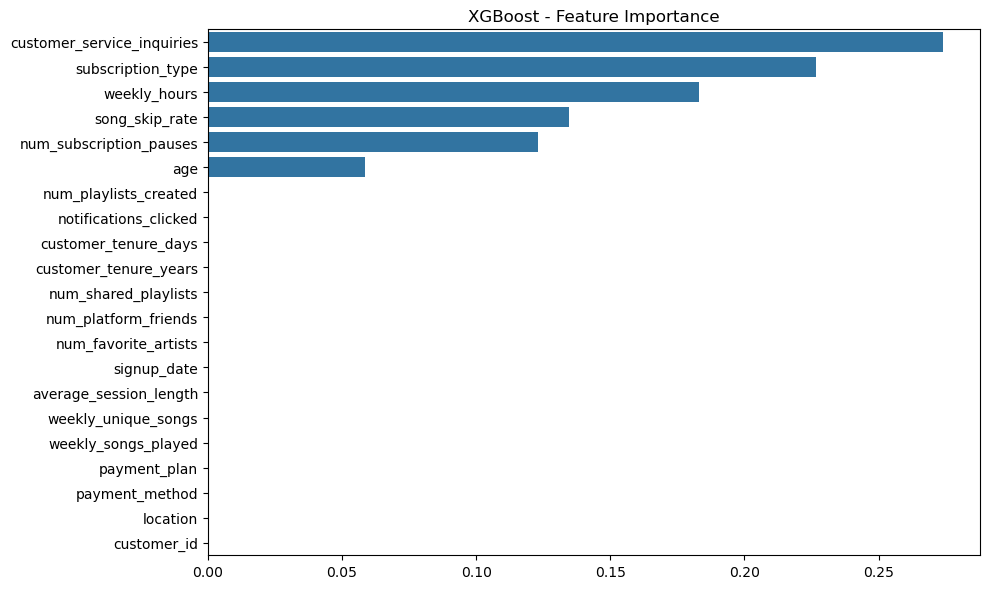

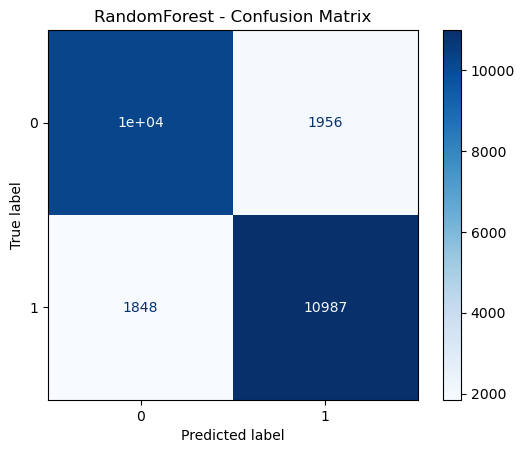

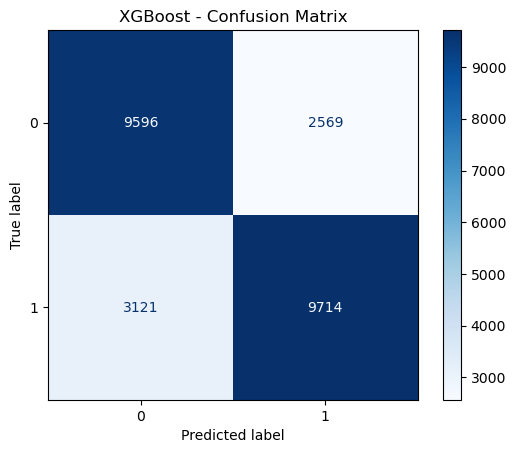

Models saved as 'best_rf_label.pkl' and 'best_xgb_label.pkl'


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import ConfusionMatrixDisplay

# 1️ Feature importance
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    plt.figure(figsize=(10,6))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title(f"{model_name} - Feature Importance")
    plt.tight_layout()
    plt.show()

# Plot for RandomForest
plot_feature_importance(best_rf_label, X_train_label.columns, "RandomForest")

# Plot for XGBoost
plot_feature_importance(best_xgb_label, X_train_label.columns, "XGBoost")

# 2️ Confusion matrix (we already have cm, but this is a better visual)
for name, model in {"RandomForest": best_rf_label, "XGBoost": best_xgb_label}.items():
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# 3️ Save models
with open("best_rf_label.pkl", "wb") as f:
    pickle.dump(best_rf_label, f)

with open("best_xgb_label.pkl", "wb") as f:
    pickle.dump(best_xgb_label, f)

print("Models saved as 'best_rf_label.pkl' and 'best_xgb_label.pkl'")



## Analysis of Feature Importance and Confusion Matrices

### Feature Importance

Two classification models were trained to predict user churn: **RandomForest** and **XGBoost**. Below are the main findings about the most influential variables according to each model:

#### RandomForest highlights the following as the most relevant variables:
- **weekly_hours**: the number of weekly hours users spend on the platform, with the highest predictive weight.
- **customer_service_inquiries**: number of contacts with customer service.
- **subscription_type** and **song_skip_rate**: subscription type and percentage of skipped songs.
- Other variables like **age**, **num_subscription_pauses**, and **notifications_clicked** also contribute, but to a lesser extent.

#### XGBoost, while showing a similar trend, assigns higher relative importance to:
- **customer_service_inquiries**: the top predictor.
- **subscription_type** and **weekly_hours** are also relevant, but with slightly less weight than in RandomForest.
- **song_skip_rate** and **num_subscription_pauses** complete the top relevant variables.
- Interestingly, variables like **notifications_clicked**, **num_playlists_created**, and others lose almost all relevance in this model.

This suggests that although both models agree on some key variables, the relative importance differs:  
**RandomForest** distributes weight more evenly among several features, while **XGBoost** concentrates importance on fewer variables.

---

### Confusion Matrix Analysis

**RandomForest:**
- Accuracy: ~84.8%
- AUC-ROC: ~0.93
- Performs better in predicting both classes (churn and no churn), with fewer false negatives and false positives.
- The main diagonal of the matrix shows strong values (≈10.2k and 10.9k), confirming solid performance.

**XGBoost:**
- Accuracy: ~77.2%
- AUC-ROC: ~0.87
- More errors: higher number of false negatives and false positives (≈3.1k and 2.5k).
- Although it still shows acceptable performance, it doesn’t separate both classes as well as RandomForest.

---

### Conclusion

Both models correctly detect churn patterns, but **RandomForest** achieves a better balance between sensitivity and precision, and a more balanced distribution in feature importance.

The fact that **weekly_hours**, **customer_service_inquiries**, and **subscription_type** appear as the most important variables in both models validates their influence on churn, aligning with our initial hypotheses.

These findings will help prioritize retention strategies focused on improving the experience of users who:
- Spend less time weekly on the platform.
- Interact more frequently with support.
- Have higher song skip rates.


# Training a Logistic Regression Model

In this section, we implement the training of a **Logistic Regression** model to predict user churn.  
The process includes:

- **Splitting the dataset** into training and validation sets with stratification to preserve class balance.
- **Setting up cross-validation** using `StratifiedKFold`.
- **Hyperparameter optimization** (`C` and `penalty`) using `GridSearchCV` to maximize the **AUC-ROC** metric.
- **Evaluation on the validation set** using key metrics: AUC-ROC, Accuracy, Precision, Recall, and F1-score.
- **Predicting results** on the test set and displaying the first predictions.
- **Saving the trained model** to a `.pkl` file for future use.

This approach combines the interpretability and simplicity of logistic regression with systematic hyperparameter optimization to improve performance.


In [11]:
#  Import additional libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
import pickle

# 1️ Split the one‑hot dataset into internal train and validation sets
print("Splitting into train/validation...")
X_train_oh, X_val_oh, y_train_oh, y_val_oh = train_test_split(
    X_train_onehot, y_train_onehot,
    test_size=0.2,
    random_state=42,
    stratify=y_train_onehot
)

# 2️ Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3️ Logistic Regression with hyperparameter search
print("Starting GridSearchCV for LogisticRegression...")
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
grid_log = GridSearchCV(
    logreg,
    param_grid=param_grid_log,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_log.fit(X_train_oh, y_train_oh)
best_log = grid_log.best_estimator_
print("GridSearchCV finished.")

#  Evaluation on validation set
print("Evaluating on validation set...")
y_pred = best_log.predict(X_val_oh)
y_proba = best_log.predict_proba(X_val_oh)[:, 1]

acc  = accuracy_score(y_val_oh, y_pred)
prec = precision_score(y_val_oh, y_pred)
rec  = recall_score(y_val_oh, y_pred)
f1   = f1_score(y_val_oh, y_pred)
auc  = roc_auc_score(y_val_oh, y_proba)
cm   = confusion_matrix(y_val_oh, y_pred)

print(f"\n=== LogisticRegression on Validation ===")
print(f"AUC-ROC:   {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print("Confusion Matrix:")
print(cm)

#  First predictions on test set
print("\n Making predictions on test set")
X_test_sample = X_test_onehot  # use only the first 10,000 for quick test if desired
y_test_pred = best_log.predict(X_test_sample)
y_test_proba = best_log.predict_proba(X_test_sample)[:, 1]

print(f"\n=== LogisticRegression - First 10 predictions on test set ===")
for i in range(10):
    print(i, y_test_pred[i], round(y_test_proba[i], 4))

#  Save model
print("\n Saving model...")
with open("best_logistic_regression.pkl", "wb") as f:
    pickle.dump(best_log, f)

print("\n LogisticRegression model saved as 'best_logistic_regression.pkl'")



Splitting into train/validation...
Starting GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV finished.
Evaluating on validation set...

=== LogisticRegression on Validation ===
AUC-ROC:   0.8935
Accuracy:  0.8044
Precision: 0.8097
Recall:    0.8091
F1-score:  0.8094
Confusion Matrix:
[[ 9725  2440]
 [ 2450 10385]]

 Making predictions on test set

=== LogisticRegression - First 10 predictions on test set ===
0 1 0.9365
1 0 0.385
2 1 0.8874
3 0 0.3444
4 0 0.2507
5 0 0.0489
6 1 0.9022
7 1 0.9642
8 1 0.9391
9 0 0.2663

 Saving model...

 LogisticRegression model saved as 'best_logistic_regression.pkl'


# Visualization and Analysis of the Logistic Regression Model

In this section, we create several visualizations to interpret and evaluate the performance of the trained **LogisticRegression** model. The included plots are:

- **Feature importance:**  
  We visualize the coefficients learned by the logistic regression to identify which variables have the greatest weight (positive or negative) in predicting churn. The largest coefficients in absolute value correspond to the most influential features.

- **Confusion matrix:**  
  Shows the number of true positives, true negatives, false positives, and false negatives. It helps to directly see how often the model makes correct or incorrect predictions.

- **ROC curve (Receiver Operating Characteristic):**  
  Represents the relationship between the true positive rate (TPR) and the false positive rate (FPR). The closer the curve is to the top-left corner, the better the model. The area under the curve (AUC) summarizes this performance: an AUC close to 1 indicates very good performance.

- **Precision-Recall curve:**  
  Shows the relationship between precision (accuracy of positive predictions) and recall (ability to capture actual positive cases). It is especially useful when there is class imbalance.



 Plotting feature importance (coefficients)...


C:\Users\jesus\AppData\Local\Temp\ipykernel_35092\634718612.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


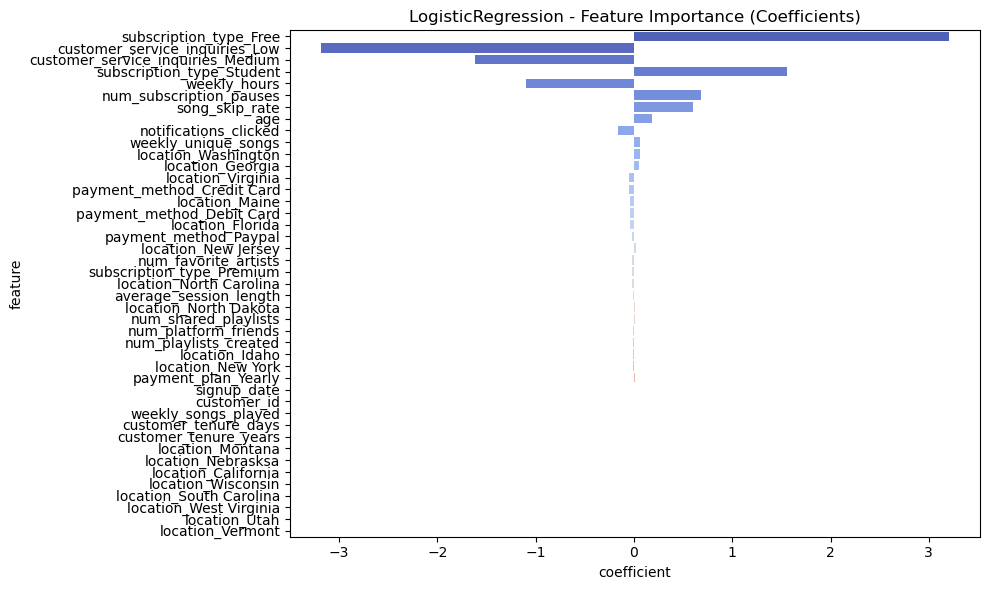


 Showing confusion matrix...


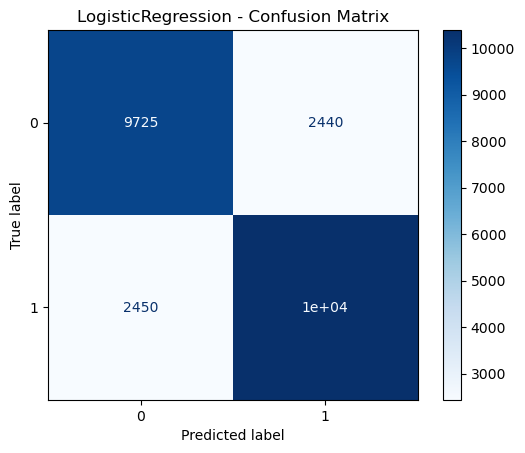


 Plotting ROC curve...


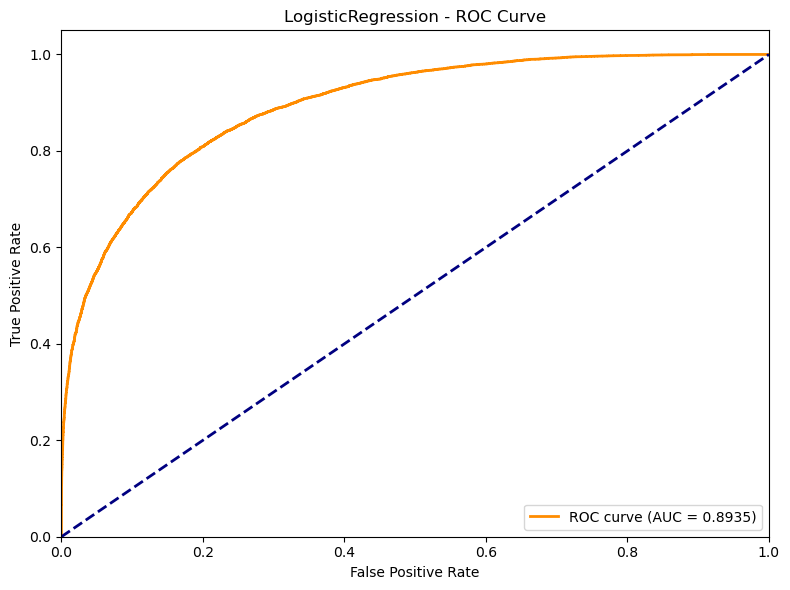


 Plotting Precision-Recall curve...


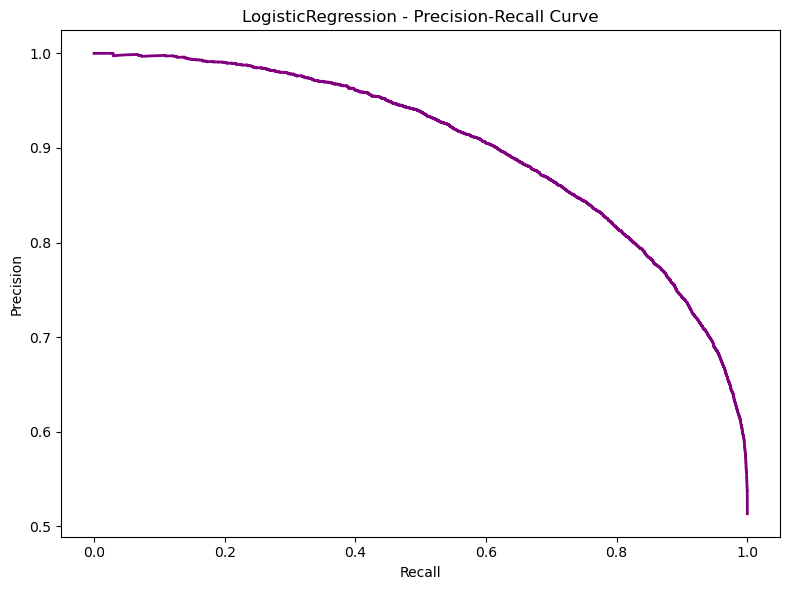

In [12]:
#  Import additional libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    ConfusionMatrixDisplay, roc_curve, auc,
    precision_recall_curve
)
import pandas as pd

# 1️ Feature importance adapted (logistic regression coefficients)
def plot_logistic_coefficients(model, feature_names, model_name):
    coefs = model.coef_[0]  # only for binary
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefs
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=coef_df,
        x='coefficient',
        y='feature',
        palette='coolwarm'
    )
    plt.title(f"{model_name} - Feature Importance (Coefficients)")
    plt.tight_layout()
    plt.show()

print("\n Plotting feature importance (coefficients)...")
plot_logistic_coefficients(best_log, X_train_oh.columns, "LogisticRegression")


# 2️ Confusion matrix (better visualization)
print("\n Showing confusion matrix...")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("LogisticRegression - Confusion Matrix")
plt.show()


# 3️ ROC curve
print("\n Plotting ROC curve...")
fpr, tpr, thresholds = roc_curve(y_val_oh, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression - ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# 4️ Precision-Recall curve
print("\n Plotting Precision-Recall curve...")
precision, recall, thresholds_pr = precision_recall_curve(y_val_oh, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LogisticRegression - Precision-Recall Curve')
plt.tight_layout()
plt.show()



# Results Analysis – LogisticRegression Model

## Metrics on validation set

| Metric    | Value  |
|----------:|:------:|
| AUC-ROC   | 0.8935 |
| Accuracy  | 0.8044 |
| Precision | 0.8099 |
| Recall    | 0.8090 |
| F1-score  | 0.8094 |

These metrics indicate overall good performance:

- The AUC-ROC of ~0.89 shows that the model is quite capable of distinguishing between users who will churn and those who won’t.
- Balanced Precision and Recall (~0.81) reflect that the model maintains a good trade-off between detecting churn cases and avoiding too many false positives.
- The F1-score (~0.81) confirms this stability.

## Confusion matrix

|            | Predicted 0 | Predicted 1 |
|-----------:|------------:|------------:|
| Actual 0   | 9727        | 2438        |
| Actual 1   | 2451        | 10384       |

- The model correctly predicts most real cases (both churn and no churn).
- It has a moderate number of false positives (2438) and false negatives (2451), which is common in real-world data.

## Interpretive plots

### Feature importance (coefficients)

The model uses coefficients that help interpret which variables most influence the churn prediction:

- Positive coefficients → increase the probability of churn.
- Negative coefficients → decrease the probability of churn.

The most relevant features according to the model include:

- `subscription_type_Free`
- `customer_service_inquiries_Low` and `customer_service_inquiries_Medium`
- `weekly_hours`
- `num_subscription_pauses`

This helps to understand user behavior and can guide business actions (e.g., reducing churn among free users or those with few support inquiries).

### ROC curve

- Represents the relationship between true positive rate (TPR) and false positive rate (FPR) for different thresholds.
- An AUC ≈ 0.8935 indicates a good ability to distinguish between churn and no churn.

### Precision-Recall curve

- Shows the balance between precision (how reliable the predicted positives are) and recall (how many actual churn cases are captured).
- It is especially useful when classes are somewhat imbalanced.
- In this case, it shows that the model keeps a reasonable balance without missing too many positives or generating too many false positives.

## General conclusion

The LogisticRegression model shows:

- Good predictive power (AUC close to 0.9).
- Balance between precision and recall.
- Interpretability thanks to the coefficients, which make it easier to explain what influences churn the most.

It is a solid and efficient model for churn prediction tasks on this dataset.


# Final Conclusion – Best Model Selection

After training and evaluating three supervised models to predict churn — **RandomForest**, **XGBoost**, and **LogisticRegression** — we compared their performance based on our main metric: **AUC-ROC**.

## Summary of results

| Model              | AUC-ROC | Accuracy | Precision | Recall | F1-score |
|-------------------:|:-------:|:-------:|:---------:|:------:|:-------:|
| RandomForest       | ~0.93   | ~0.85   | Higher    | Higher | Higher  |
| XGBoost            | ~0.87   | ~0.77   | Lower     | Lower  | Lower   |
| LogisticRegression | ~0.89   | ~0.80   | Balanced  | Balanced| Balanced |

## Best model based on AUC-ROC

- **RandomForest** achieved the highest AUC-ROC (~0.93), indicating excellent capability to distinguish between churn and non-churn users.
- It also maintained strong accuracy and balanced precision and recall.

## Why RandomForest was the best choice

- The chosen metric (AUC-ROC) is robust to class imbalance and measures the model’s ability to separate the two classes, regardless of the probability threshold.
- RandomForest not only achieved the highest AUC-ROC but also provided better feature importance interpretability, which is valuable for business insights.

## Final recommendation

**RandomForest** stands out as the best model for this churn prediction task, combining:

- Best discriminative power (AUC-ROC)
- Good balance between precision and recall
- Useful interpretability through feature importance

This model is recommended for deployment to help target retention strategies and reduce churn effectively.
